# 02 - Análisis de datos
## Trabajo MDS-2oTrim. ==> Inmigracion en Chile
### Análise de los datos específicos de la Región Metropolitana

**Profesora:** Donoso I.<br>
**Alumnos:** Briceno, H.; Rovai, M.; Tessada G.
<p>Santiago, 6 de noviembre 2018

<p><img src="./images/02_analisis_data.png"></p>

---
## Pregunta:
### "En cuales comunas se concentran los inmigrantes que llegaron a la Región Metropolitana? Quien son? Como són? Y los nuevos, donde viverán?"
---

**Importación de las principales librerias y setup inicial para las graficas**


In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(12,6))

import warnings
warnings.filterwarnings("ignore")

**Importación de la libreria y funciones para trabajar con mapas vectoriales**

`Las funciones para creación de mapas fueron desarrolladas especificamente para este trabajo`

In [2]:
import shapefile as shp

In [3]:
def map_datos(df, col, info, color=None): 
    title = col.capitalize() + ' - '+info.capitalize()
    comunas = df[df[col] == info].COMUNA.value_counts()
    comunas_nombres = df[df[col] == info].COMUNA.value_counts().index.tolist()
    comunas_data = comunas
    plot_comunas_data(sf, title, comunas_nombres, comunas_data, color)

In [4]:
def map_datos_censo(df, col, color=None, print_id=False): 
    title = title = 'CENSO 2017 - RM - ' + col
    comunas_data = df[col]
    comunas_nombres = df.NOM_COMUNA
    plot_comunas_data(sf, title, comunas_nombres, comunas_data, color)

In [5]:
def encuentra_extranjeros(df, pais, color=None): 
    title = pais.capitalize()
    comunas = df[df.PAIS == pais].COMUNA.value_counts()
    comunas_nombres = df[df.PAIS == pais].COMUNA.value_counts().index.tolist()
    comunas_data = comunas
    plot_comunas_data(sf, title, comunas_nombres, comunas_data, color)

In [6]:
def plot_comunas_data(sf, title, comunas, data, color):
    '''
    Plot map with selected comunes, using specific color
    '''
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        i = conv_comuna(i).upper()
        comuna_id.append(df[df.NOM_COMUNA == i.upper()].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id,  color_ton, bins, x_lim = None, y_lim = None, figsize = (11,9));

In [7]:
def calc_color(data, color=None):
        if color   == 1: color_sq = ['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; colors = 'Purples';
        elif color == 2: color_sq = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494']; colors = 'YlGnBu';
        elif color == 3: color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd','#969696','#636363','#252525']; colors = 'Greys';
        elif color == 9: color_sq = ['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000']
        else:            color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']; colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6)
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+" => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins

In [8]:
def read_shapefile(sf):
    """
    Converte sf file en Pandas df
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df

In [9]:
def conv_comuna(comuna):
    if comuna == 'estacion central': return 'estación central'
    elif comuna == 'nunoa': return 'ñuñoa'
    elif comuna == 'maipu': return 'maipú'
    elif comuna == 'san ramon': return 'san ramón'
    elif comuna == 'san joaquin': return 'san joaquín'
    elif comuna == 'conchali': return 'conchalí'
    elif comuna == 'penaflor': return 'peñaflor'
    elif comuna == 'san jose de maipo': return 'san josé de maipo'
    elif comuna == 'penalolen': return 'peñalolén'
    elif comuna == 'maria pinto': return 'maría pinto'
    elif comuna == 'curacavi': return 'curacaví'
    elif comuna == 'alhue': return 'alhué'    
    else: return comuna

In [10]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  color_ton, bins, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)

    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
    # fig.savefig(title)
    plt.show()

In [11]:
def plot_comunas(sf, title, comunas, color):
    '''
    Crea mapa específico para un grupo de comunas.
    La color es la misma para todas las comunas
    '''
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        i = conv_comuna(i).upper()
        comuna_id.append(df[df.NOM_COMUNA == i.upper()].index.get_values()[0])
    plot_map_fill_multiples_ids(title, comuna_id, sf, x_lim = None, y_lim = None, figsize = (11,9), color = color); 

In [12]:
def plot_map_fill_multiples_ids(title, comuna, sf, x_lim = None, y_lim = None, figsize = (11,9), color = 'r'):
    '''
    Crea mapa con lim coordenadas
    '''
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)

    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k');
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
        print(id, sf.records()[id][5])
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
    # fig.savefig(title)

#### Galeria de Mapas / Resultados definitivos do Censo 2017 - INE
Region Metroplitana de Chile (R13) <br>
http://www.ine.cl/herramientas/galeria-de-mapas/censo
<p>Separar archivos relacionados a "Comuna"</p>

- Comuna.cpg
- Comuna.shp
- Comuna.dbf 
- Comuna.shp.xml
- Comuna.prj 
- Comuna.shx
- Comuna.sbn 
- Comuna.sbx

In [13]:
shp_path = "./data/Comunas_RM_Mapas_Vectoriales/Comuna.shp"
sf = shp.Reader(shp_path)

---

## 1. Importar el dataset

En esta etapa del proyecto, analisaremos datos de los extranjeros en la Región Metropilitana. Los datos fueron obtenídos a partir de los datos crudos de: [Departamento de Extranjeria y Migracion de Chile](http://www.extranjeria.gob.cl/estadisticas-migratorias/). 

La base de datos "limpía", se obtube a partir del notebook: 
- 01-Limpieza-Enriquecimiento.ipynb

**Información constante del dataset** <br>
- PAIS  - (País de origen)
- SEXO	
- EDAD - (la edad en el año que recibió el benefício)
- ESTUDIOS	
- ACTIVIDAD	
- PROFESION
- BENEFICIO - (Visa temporária o definitiva)
- TIT_DEP - (El que recibe el benefício es Titular o Dependente)
- ANIO - (año en que recibió el benefício)
- COMUNA


In [14]:
ls ./data

01_extranjeros_rm.xlsx                 PDs_2018_1.xlsx
CENSO_2017_COMUNAS_RM.xlsx             Visas-2017.xlsx
Comunas_RM_Mapas_Vectoriales/          Visas-2018_1.xlsx
ML_extranjeros_rm.xlsx                 censo_2017_RM.xlsx
PDs-2005-2016.xlsx                     censo_2017_inmigrantes_rm_comuna.xlsx
PDs-2017.xlsx


In [15]:
df = pd.read_excel('./data/01_extranjeros_rm.xlsx')
df.shape

(589106, 10)

In [16]:
df.head(2)

PAIS       SEXO  EDAD    ESTUDIOS ACTIVIDAD  PROFESION   BENEFICIO  \
0     peru   femenino    32  no informa  empleado    matrona  definitiva   
1  ecuador  masculino    58  no informa  empleado  ingeniero  definitiva   

  TIT_DEP  ANIO       COMUNA  
0       t  2006     santiago  
1       t  2007  providencia

## 2. Analisis Datos Inmigrantes Region Metropolitana

<p><img src="./images/RM_Map_Index.png"></p>

**Este analisis esta basado en la informacion sumunistrada por el dataset del primer notebook. En este notebook primordialmente se trata de analizar los datos y apartir de una visualización  para mejorar el entendimiento de los datos ya limpios y enriquecidos en el notebook antecesor. La finalidad es conocer a los inmigrantes que se concentran en la RM apartir del analisis de los datos.**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589106 entries, 0 to 589105
Data columns (total 10 columns):
PAIS         589106 non-null object
SEXO         589106 non-null object
EDAD         589106 non-null int64
ESTUDIOS     589106 non-null object
ACTIVIDAD    589106 non-null object
PROFESION    589106 non-null object
BENEFICIO    589106 non-null object
TIT_DEP      589106 non-null object
ANIO         589106 non-null int64
COMUNA       589106 non-null object
dtypes: int64(2), object(8)
memory usage: 49.4+ MB


**Describimos primordialemente el top ten de los paises con mayor volumetria que mas se encuentran en la RM. Con eso se desea observar cuales son los principales paises de donde vienen los inmigrantes para responder parte de la pregunta realizada, "En cuales comunas se concentran los inmigrantes que llegaron a la Región Metropolitana?"**

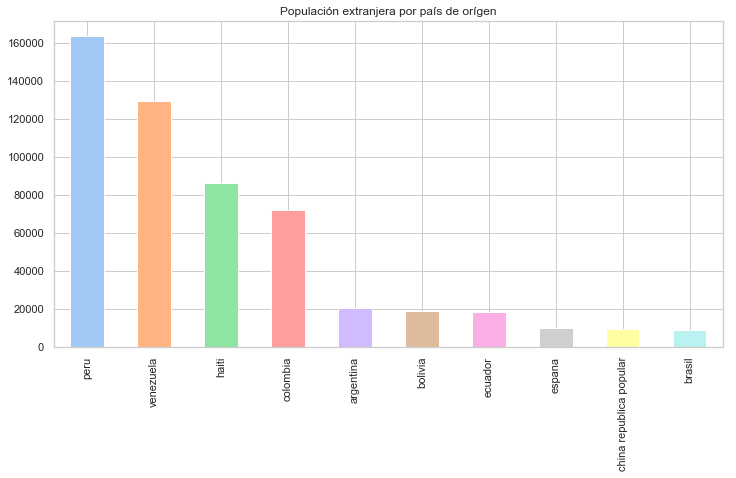

In [99]:
top_pais = df.PAIS.value_counts()[0:10]
top_pais.plot.bar(title="Populación extranjera por país de orígen")

`El gran numero de extranjeros en la region metroplitana está concentrada en peruanos, venezuelanos, haitianos y colombianos, con esto respondemos parte de la pregunta, cuales son los inmigrantes que mas se concentran.` 

`Con esto tambien evaluamos en que momento es que en la mayoria de los extranjeros se le ha otorgado el beneficio de residencia. Pero, es importante tener en cuenta que para "Residencia Definitiva", el beneficio para ser otorgado, los extranjeros deben pasar al menos dos años dentro del pais. Así, en caso se necesite una estimación mas precisa de su llegada al país, debese de sacar 2 anões de la data constante del dataset. Para los casos de los VISTOS otorgados en 2017/2018, el año de entrada puede ser considerado como el año de recebimento del benefício`

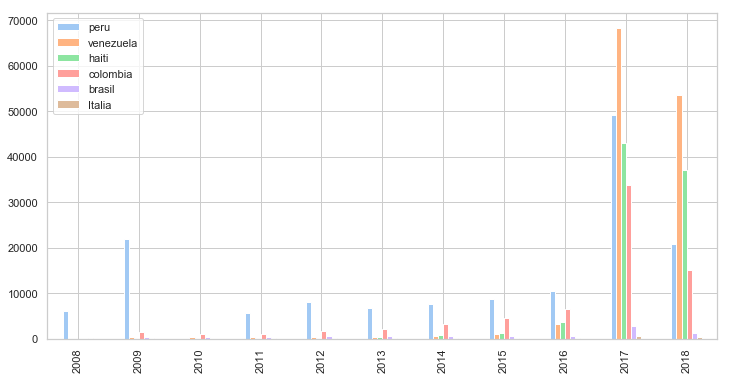

In [100]:
pe = df[df.PAIS == 'peru'].ANIO.value_counts()[0:10]
ve = df[df.PAIS == 'venezuela'].ANIO.value_counts()[0:10]
ha = df[df.PAIS == 'haiti'].ANIO.value_counts()[0:10]
co = df[df.PAIS == 'colombia'].ANIO.value_counts()[0:10]
br = df[df.PAIS== 'brasil'].ANIO.value_counts()[0:10]
it = df[df.PAIS=='italia'].ANIO.value_counts()[0:10]

ext_anio = pd.concat([pe, ve], axis = 1)
ext_anio = pd.concat([ext_anio, ha], axis = 1)
ext_anio = pd.concat([ext_anio, co], axis = 1)
ext_anio = pd.concat([ext_anio, br], axis = 1)
ext_anio = pd.concat([ext_anio, it], axis = 1)
ext_anio.columns = ['peru', 'venezuela', 'haiti', 'colombia', 'brasil', 'Italia']
ext_anio.plot.bar()

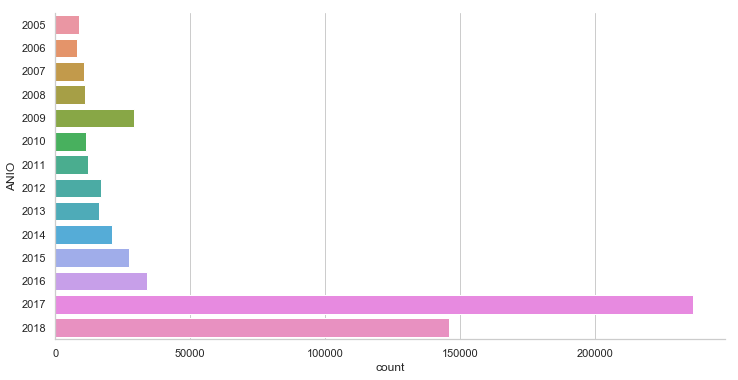

In [101]:
sns.countplot(y=df['ANIO'],)
sns.despine()

`Observamos que los desplazamientos mayormente surgieron entre los años 2014 y 2016, siendo esto considerado y sumamente apreciable la llegada de extranjeros para estos años en su mayoria son haitianos, venezolanos y colombianos. Un dato importante y muy apreciable es la tendencia para el año 2010 la llegada de inmigrantes descendio, debido al terremoto. Muy importante hallazgo.`  

**Con esto ya descrito, ahora veremos donde esta la distribucion de los extranjeros en la RM, esta grafica es sin distincion de las nacionalidades solo observar la densidad con respecto a las comunas.**


1: 245 => 880 
2: 881 => 3523 
3: 3524 => 6107 
4: 6108 => 8878 
5: 8879 => 14851 
6: 14852 => 162324 

   1   2   3   4   5   6


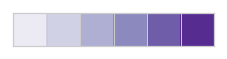

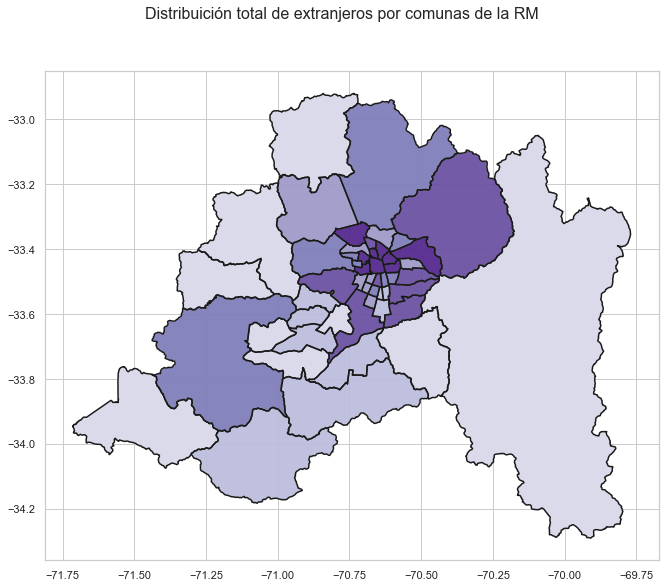

In [21]:
title = 'Distribuición total de extranjeros por comunas de la RM'
comunas_data = df.COMUNA.value_counts()
comunas_nombres = df.COMUNA.value_counts().index.tolist()
plot_comunas_data(sf, title, comunas_nombres, comunas_data, color = 1)

`Vemos como la mayor concentracion de inmigrantes se encuentran en la comuna de Santiago en las comunas aledañas, como Providencia, Estacion Central, etc. Planteando esto vemos como se concentran con respecto a las comunas mas graficamente y en conteo en la proxima grafica:`

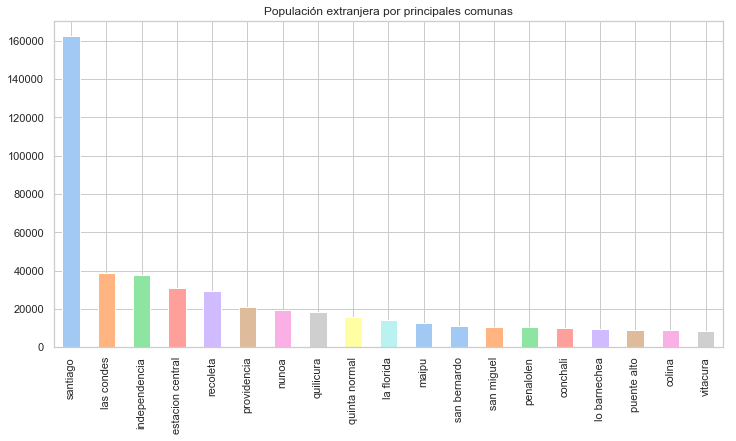

In [102]:
top_com = df.COMUNA.value_counts()[0:19]
top_com.plot.bar(title="Populación extranjera por principales comunas")

Con esta informacion podemos responder,

### En cuales comunas se concentran los inmigrantes que llegaron a la Región Metropolitana?

`Con esto constatamos que la mayor concentracion de extranjeros se encuentra en la comuna de Santiago. Seguido por la comuna de Las Condes, planteando esto seguimos analisando los datos para ver comportamiento claros. Con esta informacion valiosa podemos hacer ya inferencia sobre la parte de la primere pregunta: "En cuales comunas se concentran los inmigrantes que llegaron a la Región Metropolitana?". La respuesta a esta pregunta es clara, es la comuna de Santiago donde se concentran los inmigrantes.`

### Con esta informacion ya descrita, continuamos respondiendo parte de la  pregunta, quienes son? Como son?

**Para seguir conociendo a los extranjeros, primordialmente comenzamos describiendo el sexo de los inmigrantes y comparar su distribucion:**

In [23]:
TOT_INM = len(df.SEXO)
sum(df.SEXO=='masculino')
sum(df.SEXO=='femenino')
print ("Porcentage de mujeres versus hombres: {}%"
       .format(round(100* sum(df.SEXO=='femenino')/TOT_INM)))

Porcentage de mujeres versus hombres: 49%


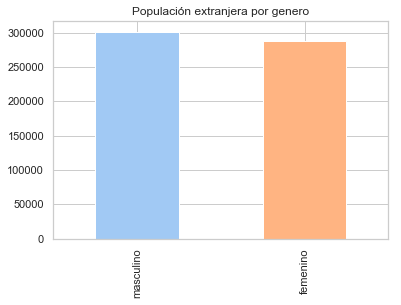

In [24]:
data = df.SEXO.value_counts()[0:10]
data.plot.bar(title="Populación extranjera por genero")

`El numero de hombres es un poco mas grande que las mujeres, pero no llega a ser una diferencia significtiva (2%).`

**Con esto planteamos una visualizacion geografica pra observar en donde se concentran por genero dentro de la RM.**


1: 169 => 579 
2: 580 => 1853 
3: 1854 => 2930 
4: 2931 => 4128 
5: 4129 => 7635 
6: 7636 => 83390 

   1   2   3   4   5   6


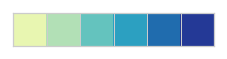

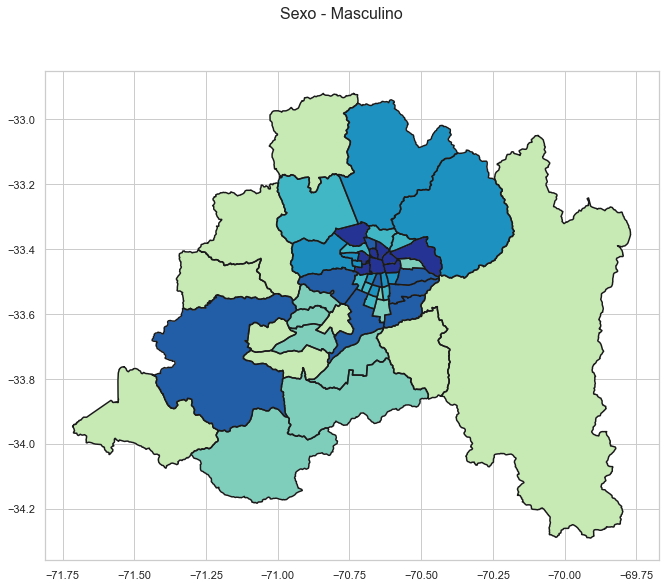

In [25]:
map_datos(df, 'SEXO', 'masculino',  color = 2)

`Con los hombres se observa una concentración mas a sur-poniente, muy probablemente por trabajos como "Obrero" en viniculas/zonas agrículas, como se puede comprobar abajo en el mapa de la actividad "obrero":`


1: 8 => 60 
2: 61 => 142 
3: 143 => 184 
4: 185 => 321 
5: 322 => 586 
6: 587 => 3702 

   1   2   3   4   5   6


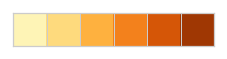

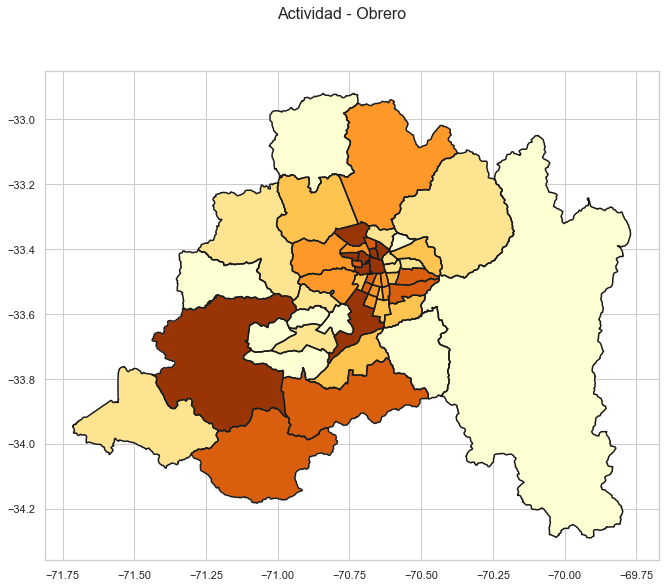

In [26]:
map_datos(df, 'ACTIVIDAD', 'obrero',  color = 5)

`Con esta comparacion es apreciable que los inmigrante hombres se concentran a las afueras de RM. Los cuales en su mayoria se encuentran en poblaciones rurales de la RM pero escencialmente estos trabajos son en viñedos o de construccion de conjuntos residenciales.`

**Si realizamos el mismo analisis pero para el genero femenino, veremos que sucede.**


1: 73 => 300 
2: 301 => 1592 
3: 1593 => 2729 
4: 2730 => 4558 
5: 4559 => 7214 
6: 7215 => 78933 

   1   2   3   4   5   6


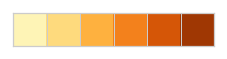

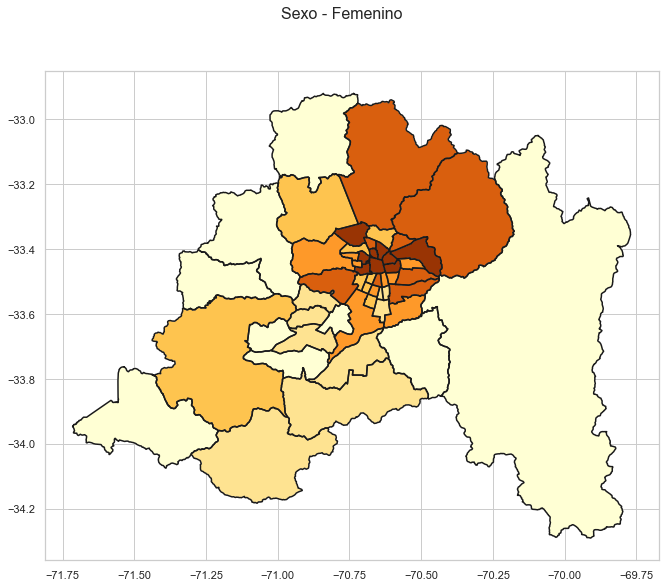

In [27]:
map_datos(df, 'SEXO', 'femenino',  color = 4)

`Se observa un número mas grande de mujeres que hombres en la region nor-oriente, muy probablemente por haber concentración de casas/departamentos que utilizan servicios domésticos, como se puede comprobar por el mapa abajo:`


1: 2 => 44 
2: 45 => 218 
3: 219 => 594 
4: 595 => 921 
5: 922 => 1671 
6: 1672 => 12985 

   1   2   3   4   5   6


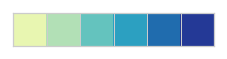

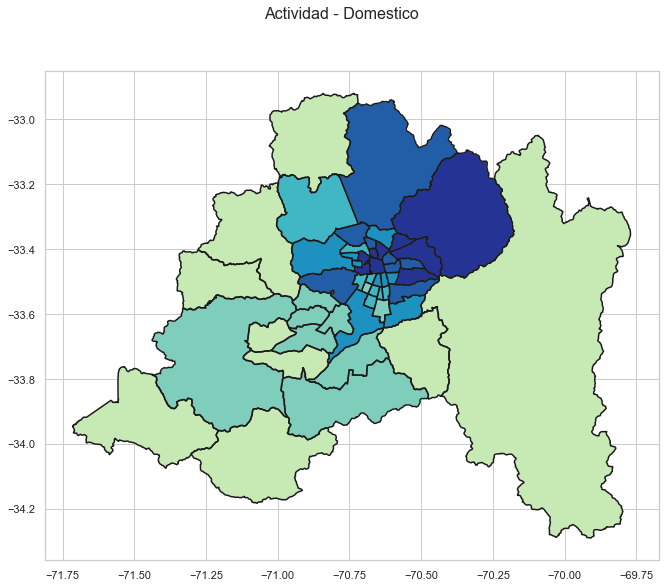

In [28]:
map_datos(df, 'ACTIVIDAD', 'domestico',  color = 2)

**Ahora revisaremos el nivel del estudio de los extranjeros y veremos en que comuna se concentran, con el fin de seguirlos conociendolos.**

In [29]:
df.ESTUDIOS.value_counts()

no informa       288181
medio            145061
universitario     76458
basico            44522
tecnico           27726
ninguno            7158
Name: ESTUDIOS, dtype: int64

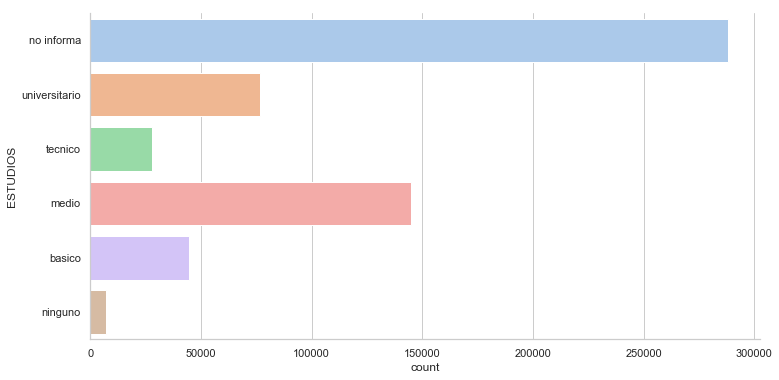

In [103]:
sns.countplot(y=df['ESTUDIOS'])
sns.despine()

`Observamos como la mayor concentracion esta en el sector que no informa pero igualmente ignorando este sector se puede sacar informacion sobre los otros segmentos.` 

**Con esta informacion, describimos con informacion geografica como se encuentran los extranjeros segun sus niveles de estudios en la gran region metropolitana.**  


1: 5 => 61 
2: 62 => 153 
3: 154 => 310 
4: 311 => 851 
5: 852 => 1275 
6: 1276 => 28389 

   1   2   3   4   5   6


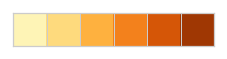

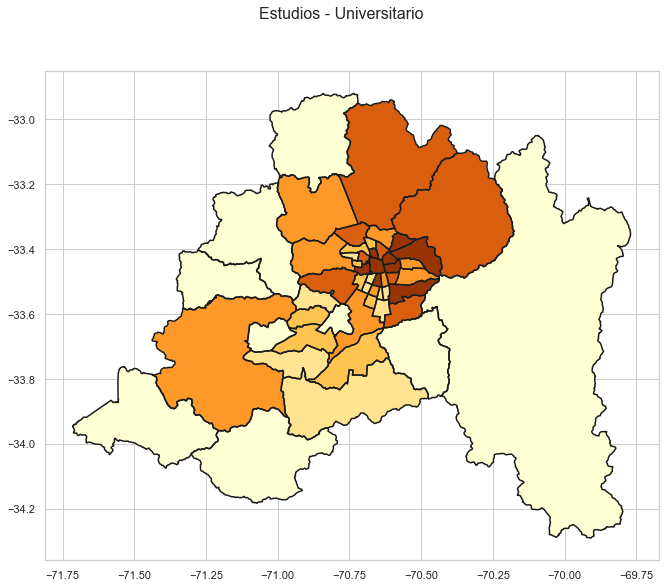

In [31]:
map_datos(df,'ESTUDIOS', 'universitario')



1: 4 => 35 
2: 36 => 101 
3: 102 => 224 
4: 225 => 330 
5: 331 => 676 
6: 677 => 9284 

   1   2   3   4   5   6


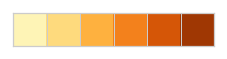

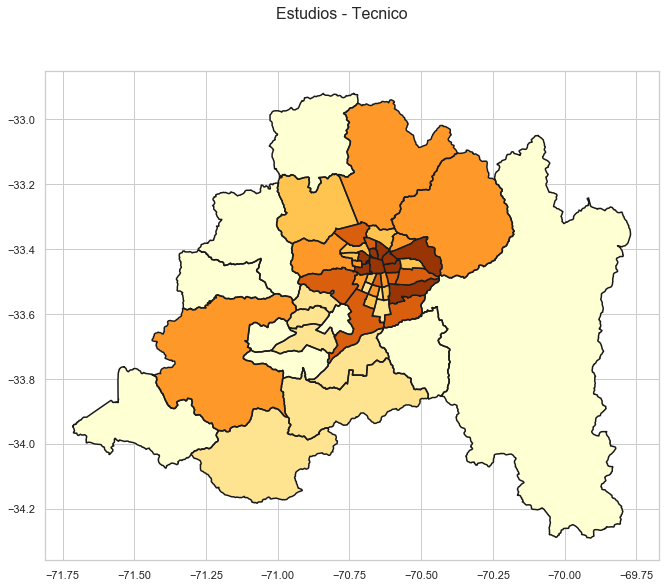

In [32]:
map_datos(df,'ESTUDIOS', 'tecnico')


1: 92 => 382 
2: 383 => 989 
3: 990 => 1679 
4: 1680 => 2226 
5: 2227 => 3380 
6: 3381 => 35688 

   1   2   3   4   5   6


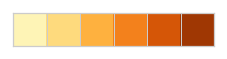

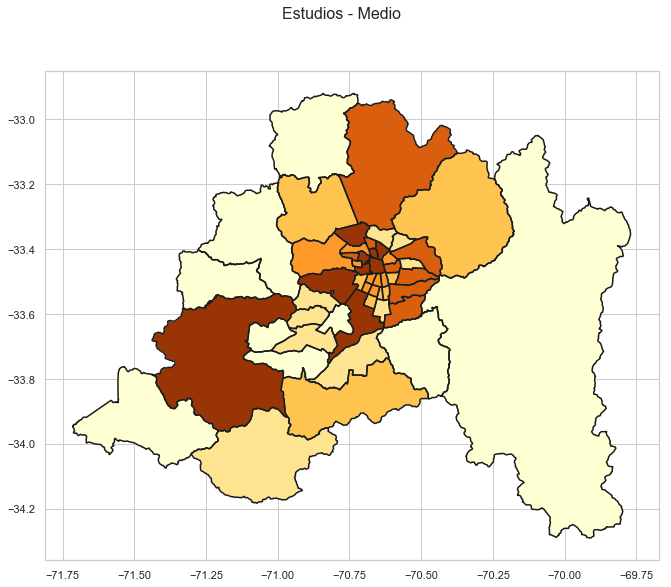

In [33]:
map_datos(df,'ESTUDIOS', 'medio')

`En una comparacion de los extranjeros que presentan diferentes niveles de escolaridad, se muestra claramente que la concentracion de extranjeron con un mayor grado de escolaridad prefieren vivir en la zona Central y Oriente.`

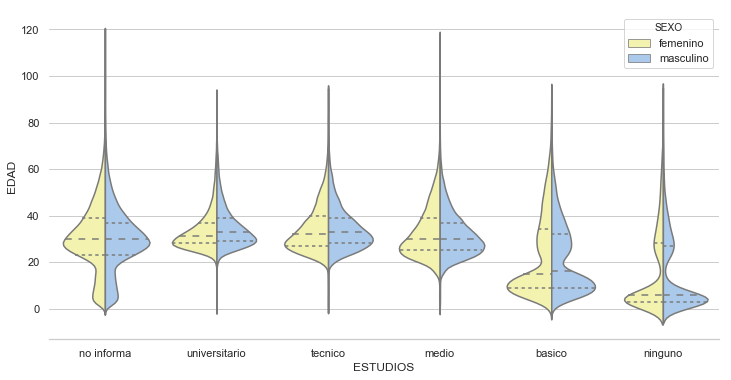

In [104]:
sns.violinplot(x="ESTUDIOS", y="EDAD", hue="SEXO",
               split=True, inner="quart",
               palette={"masculino": "b", "femenino": "y"},
               data=df)
sns.despine(left=True)

`Entre los extranjeros que entregan información de su grado de estudios, se observa la grande mayoria que declara "basico" o "ningún" són niños. Por lo que se puede concluyer que la gran mayoria de los extranjeros que llegan a Chile tienen buen nivel de escolariadad.`

`Comparando el nivel de estudio con respecto a los generos y la edad vemos como para cada segmento tanto para los hombres como para las mujeres es similar y comparado con respecto a cada nivel vemos el basico es razonablemente logico. Pero si existe una gran concentracion de este basico que se diluye y existe una tendencia de extranjeros con nivel de estudio basico. En una comparacion mas profunda sobre las nacionalidades y sus niveles de estudio podemos observas que:`

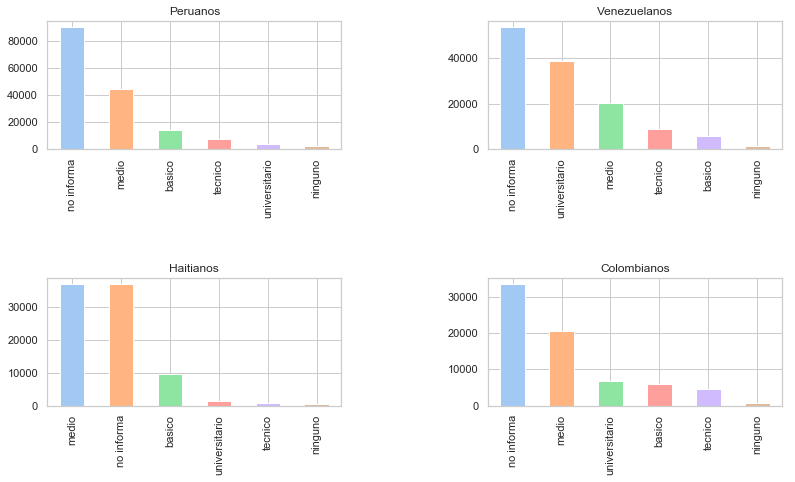

In [105]:
pe = df[df.PAIS == 'peru'].ESTUDIOS.value_counts()[0:10]
ve = df[df.PAIS == 'venezuela'].ESTUDIOS.value_counts()[0:10]
ha = df[df.PAIS == 'haiti'].ESTUDIOS.value_counts()[0:10]
co = df[df.PAIS == 'colombia'].ESTUDIOS.value_counts()[0:10]

plt.figure(1)
plt.subplot(221)
pe.plot.bar(title="Peruanos")
plt.subplot(222)
ve.plot.bar(title="Venezuelanos")
plt.subplot(223)
ha.plot.bar(title="Haitianos")
plt.subplot(224)
co.plot.bar(title="Colombianos")
plt.subplots_adjust(top=0.9, bottom=0.01, left=0.10, right=0.95, hspace=1,
                    wspace=0.5)

`Se observa que los venezuelanos són de lejos los mejores calificados entre no grupo de principales paises, con alta porcentaje de universitários, y pudiendo unir informacion de los dos graficos anteriores vemos como para el caso de los peruanos y haitianos existe un importante porcentaje en el basico. Con esto y con la ubicacion de donde se encuentran los extranjeros por estudios vemos como existe una relacion directa de que los extranjeros que tienen una educacion mayor buscan vivir en un sector donde los servicios aunque mas caros son mejores en calidad y prestacion para la zona centro-oriente. Importante inferencia para describir de un inmigramnte que llega con estudios superiores siempre buscara vivir en zonas mejores en la RM.`

**Con el fin de caracterizar  aun mas a los extranjeros y poder conocerlos mas a fondo, observaremos cual es la concentracion con respecto a permisos de visa otorgadas y que tipo de visas presentan con respecto al otorgamiento.**

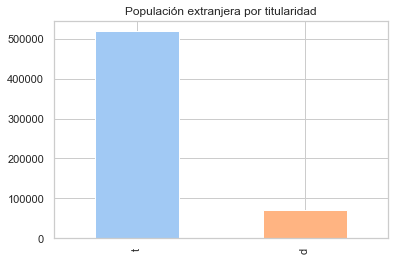

In [36]:
data = df.TIT_DEP.value_counts()[0:10]
data.plot.bar(title="Populación extranjera por titularidad")

`La gran mayoria de los benefícios són para titulares, si bien es una indicacion que la mayor concentracion de inmigrantes son adultos titulares, siendo el beneficio de dependiente muy bajo, lo cual en la mayoria de los casos quienes solicitan este beneficio de residencia definitiva son personas titulares.`

**Para realizar un analisis mas profundo de este otorgamiento de beneficios de residencia definitiva, compararemos el pais, la edad y el tipo de beneficio con respecto asi es titular o dependiente y lo compararemos particularmente con la nacionalidad de los inmigrantes.** 

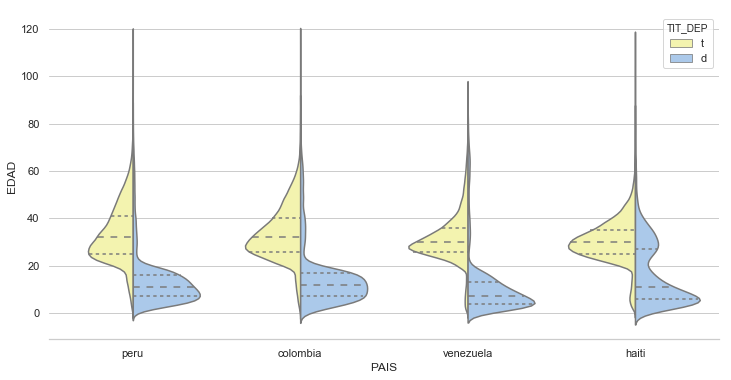

In [106]:
pais = df[(df.PAIS == 'peru') | 
          (df.PAIS == 'venezuela') |
          (df.PAIS == 'haiti') |
          (df.PAIS == 'colombia')]

sns.violinplot(x="PAIS", y="EDAD", hue="TIT_DEP",
               split=True, inner="quart",
               palette={"d": "b", "t": "y"},
               data=pais)
sns.despine(left=True)

`Sorprendentemente observamos un compotamiento muy marcado con respecto a las diferentes nacionalidades, para el caso de Peru, Colombia y Venezuela, las edades de los dependientes en su mayoria son niños y jovenes menores a los 20 años, siendo bastante marcado este comportamiento donde la mayoria de los titulares son personas adultas. Caso diverso para los haitianos donde si existe presencia de gente mayor a los 20 años que son dependientes, en este caso pueden ser que los rasgos y costumbres familiares sea el hombre que en su mayoria es el titular y las mujeres sean dependientes.` 

**Para seguir conociendo la edad de los inmigrantes, decribimos algunos estadisticos basicos.**

In [38]:
df.EDAD.describe()

count    589106.000000
mean         30.692712
std          13.012231
min           0.000000
25%          24.000000
50%          30.000000
75%          38.000000
max         118.000000
Name: EDAD, dtype: float64

`Vemos como dato relevante la edad promedio de los inmigrantes es de 30 años, una poblacion joven. Ahora evaluamos su distribucion de las edades.`

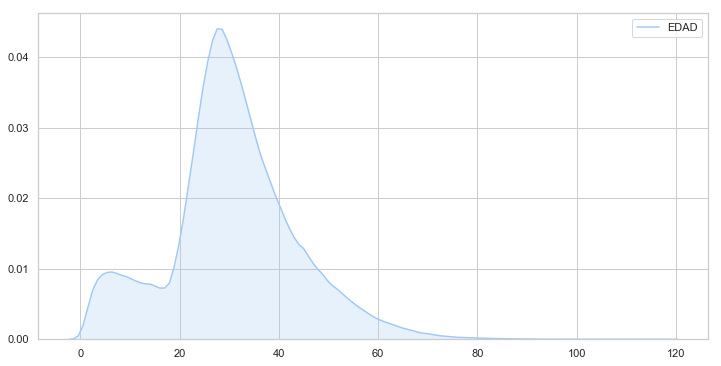

In [107]:
sns.kdeplot(df.EDAD, shade=True)

`Observamos un comportamiento marcado donde su distribucion se concentra entre los 20 y los 30 años. Siendo marcado tambien que los niños tambien tienen una importante concentracion.`

**Ya conociendo la edad de los inmigrantes ahora veremos como es su distribucion con respecto a su sexo y a su edad, y como se distribuyen con respecto a los 4 paises con mayor concentracion y tambien Brasil (pais mas grande de AL) y Italia (pais europeu).**

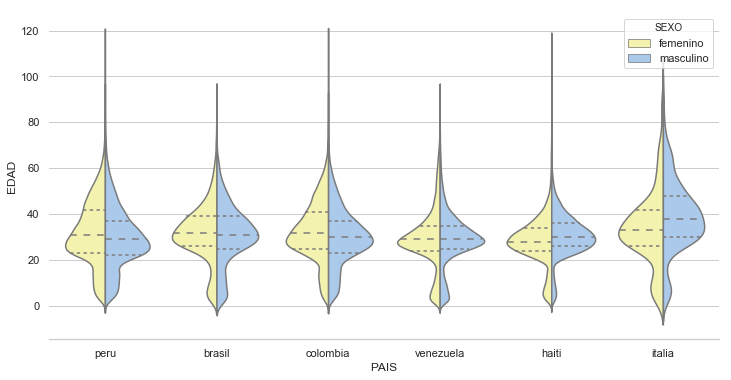

In [108]:
pais = df[(df.PAIS == 'peru') | 
          (df.PAIS == 'venezuela') |
          (df.PAIS == 'haiti') |
          (df.PAIS == 'colombia') |
          (df.PAIS == 'brasil') |
          (df.PAIS == 'italia')]


sns.violinplot(x="PAIS", y="EDAD", hue="SEXO",
               split=True, inner="quart",
               palette={"masculino": "b", "femenino": "y"},
               data=pais)
sns.despine(left=True)

`Se observa que la edad media de los extranjeros al obtener el beneficio, es de 30 años, con una concentración entre 24 y 38 anõs. Hay también un gran numero de niños. Se observa que los niños venezolanos y haitianos tienen menos edad que los de Peru y Colombia. Los venezolanos son los mas jovenes. Apreciablemente los hombres italianos son mayores comparados con las mujeres. Es muy probable, que los italianos ya llegan a Chile pensando en pasar la jubilación en el país y no construyir su vida, como en el caso de jovens Venezuelanos o Haitianos. En en caso de Peru, el hecho que tienen mayores recebiendo los benefícios, debe ser en parte por que loa jovenens de la família habían llegado antes y los trajeron a posteriori.`

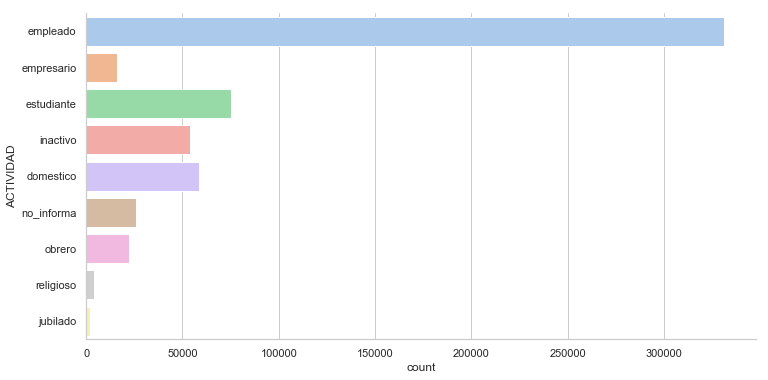

In [109]:
sns.countplot(y=df['ACTIVIDAD'])
sns.despine()

In [42]:
len(df.PROFESION.unique())

616

`Como profesion, se observa que hay un numero muy grande de diferentes valores (616), por lo que denota que no existe critério para la captura de este dato. Esta característica, dada su disperción, no nos parece útil en la preparación final de la data, pero abajo se puede observar las 10 mas significativas. En un trabajo mas profundo se podría definir clusters para las mismas.`

In [43]:
df.PROFESION.value_counts()[0:20]

empleado             75403
estudiante           59121
asesora del hogar    55115
menor de edad        33376
duena de casa        27646
ingeniero            20895
ayudante             18905
vendedor             18617
jornalero            17096
aseador              11498
operario              9731
licenciado            9638
auxiliar              8569
tecnico               8568
no informa            8475
obrero                8135
garzon                5824
asistente             5730
contador              5690
cocinero              5517
Name: PROFESION, dtype: int64

`Pero, analizando algunos casos mas emblemáticos, donde viven los extranjeros con respecto a sus profesiones, tomando en cuenta a las tres primeras profesiones, vemos que:`


1: 52 => 201 
2: 202 => 488 
3: 489 => 752 
4: 753 => 1105 
5: 1106 => 1891 
6: 1892 => 19080 

   1   2   3   4   5   6


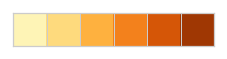

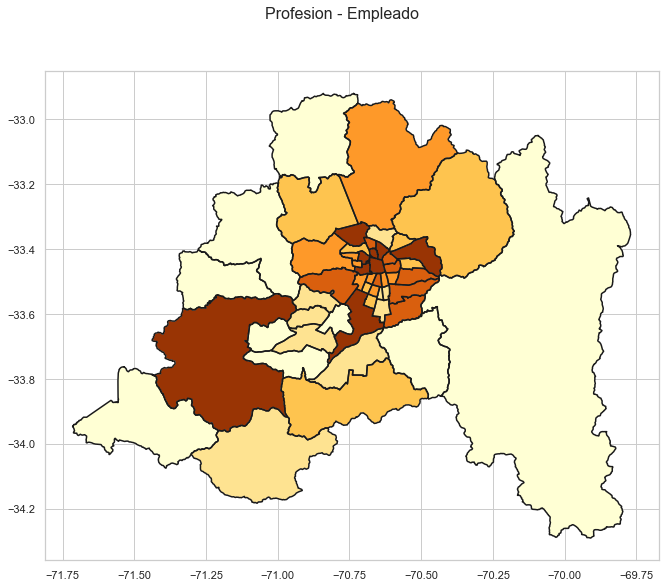

In [44]:
map_datos(df,'PROFESION', 'empleado')

`Si bien se encuentran empleado, como profesion es bastante ambiguo, ya que no se especifica que tipo de empleo se tiene, pero por el mapa se pueden observar las comunas donde mayor concentracion se tiene, y se observa como hay una concentracion en el sector nor-oriente a la fueras del centro donde existe un sector de viñedos, son trabajos mas pesados y rurales, concantenado se encuentramn los sectores del centro, providencia, y Las Condes que son sectores en su mayoria empresariales ejecutivos. `

`Al igual que para el sector mas empresarial, comunas como Quilicura, Conchali, Colina, Independencia.`

**Veremos donde se encuentran los extrajeros que tienen profesiones ejecutivas.**


1: 1 => 8 
2: 9 => 20 
3: 21 => 40 
4: 41 => 163 
5: 164 => 368 
6: 369 => 7833 

   1   2   3   4   5   6


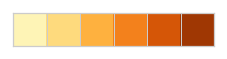

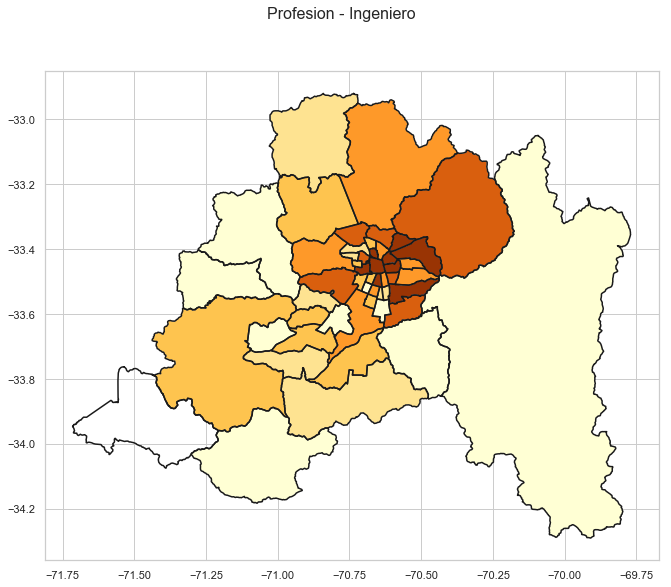

In [45]:
map_datos(df, 'PROFESION', 'ingeniero')

**y evaluamos otra profesion**


1: 1 => 5 
2: 6 => 13 
3: 14 => 22 
4: 23 => 70 
5: 71 => 158 
6: 159 => 4536 

   1   2   3   4   5   6


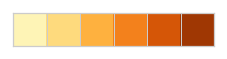

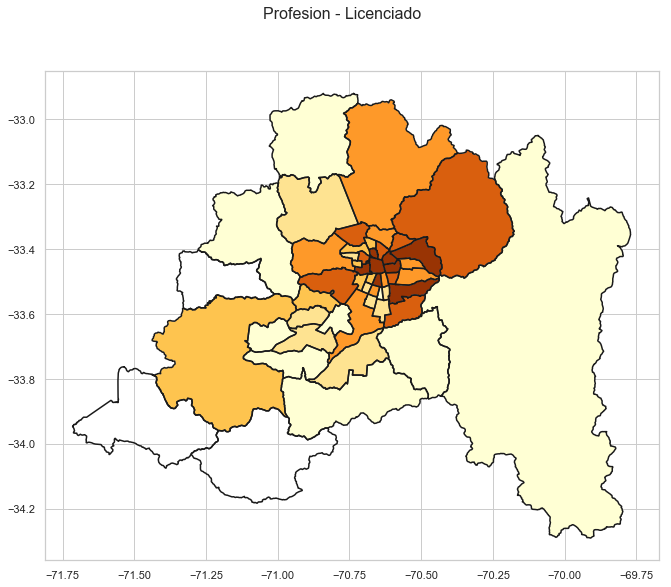

In [46]:
map_datos(df, 'PROFESION', 'licenciado')

`Vemos como para las dos profesiones ejecutivas, las residencias se encuentran al rededor del centro, y las comunas de Providencia, Ñuñoa, Las Condes, entre otras.`

**Comparandolos con profesiones no ejecutivas como ayudante, jornalero, operario, podemos comparar:**
    


1: 1 => 26 
2: 27 => 84 
3: 85 => 239 
4: 240 => 285 
5: 286 => 444 
6: 445 => 4464 

   1   2   3   4   5   6


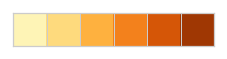

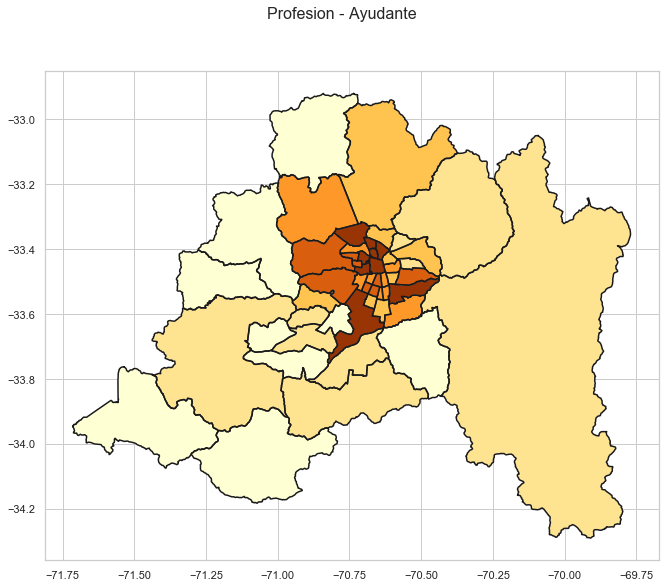

In [47]:
map_datos(df, 'PROFESION', 'ayudante')


1: 6 => 18 
2: 19 => 71 
3: 72 => 166 
4: 167 => 271 
5: 272 => 497 
6: 498 => 2697 

   1   2   3   4   5   6


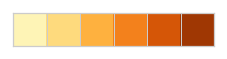

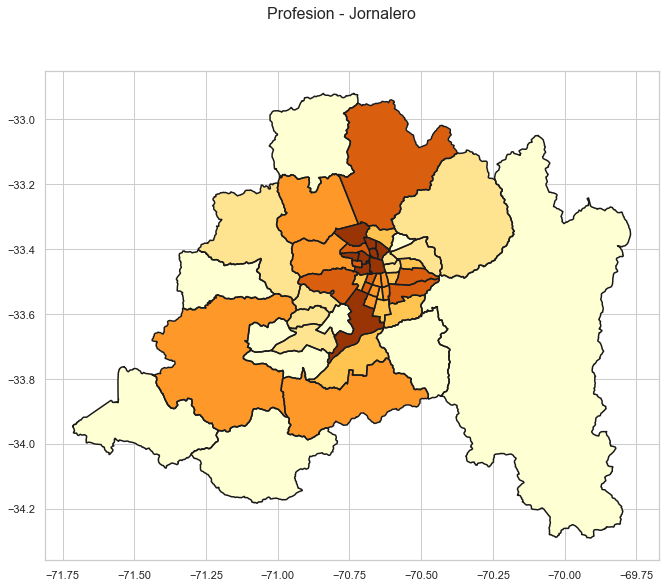

In [48]:
map_datos(df, 'PROFESION', 'jornalero')


1: 1 => 22 
2: 23 => 45 
3: 46 => 63 
4: 64 => 86 
5: 87 => 213 
6: 214 => 1363 

   1   2   3   4   5   6


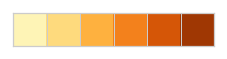

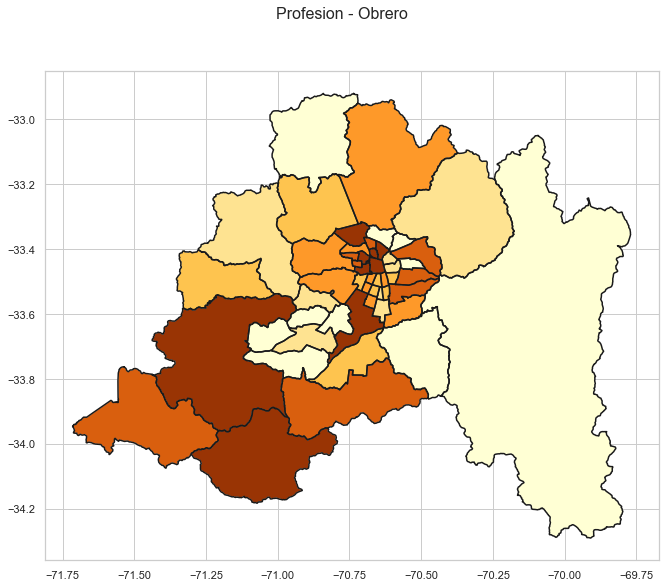

In [49]:
map_datos(df, 'PROFESION', 'obrero')

`Es mucho mas marcado las tendencias a otras comunas con respecto a diferentes profesiones, concluimos entonces que depende mucho de la profesion a la que el extranjero se dedique y el lugar donde se encuentra viviendo, ya que segun estas distribuciones, vemos que si es una profesion ejecutiva las comunas donde viven los extranjeros son comunas donde la plusvalia y el costo de la vida es mayor. Comparado con el otro sector de trabajos menos remunerados los sectores donde viven son sectores mas rurales, y a las afueras del centro de la RM.`

**Con esta informacion ya conocemos un poco mas de como son los extranjeros que viven en la RM, pero con respecto a todos estos factores, evaluamos donde viven por cada nacionalidad.**

**Primeramente hacemos un conteo general de cuantos son los extranjeros.**

In [50]:
df['ANIO'].describe()

count    589106.000000
mean       2015.398741
std           3.380676
min        2005.000000
25%        2015.000000
50%        2017.000000
75%        2017.000000
max        2018.000000
Name: ANIO, dtype: float64

**Con casi 590 mil extranjeros para el 2018, veremos como se encuentran distribuidos:** 

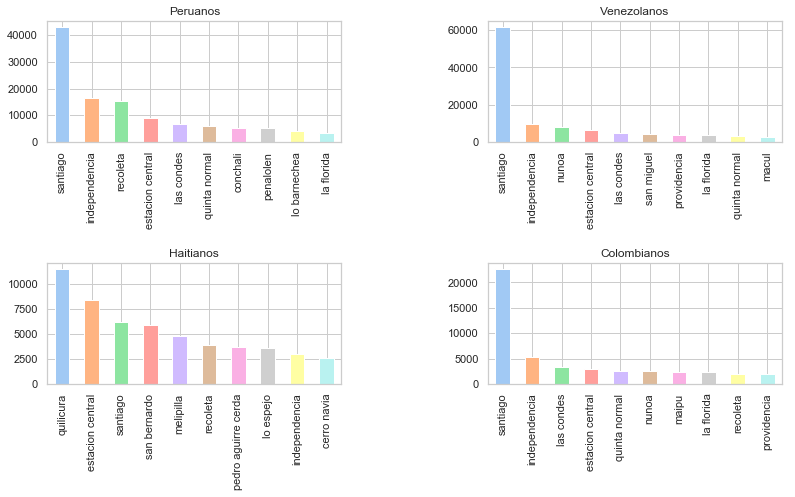

In [110]:
pe = df[df.PAIS == 'peru'].COMUNA.value_counts()[0:10]
ve = df[df.PAIS == 'venezuela'].COMUNA.value_counts()[0:10]
ha = df[df.PAIS == 'haiti'].COMUNA.value_counts()[0:10]
co = df[df.PAIS == 'colombia'].COMUNA.value_counts()[0:10]

plt.figure(1)
plt.subplot(221)
pe.plot.bar(title="Peruanos")
plt.subplot(222)
ve.plot.bar(title="Venezolanos")
plt.subplot(223)
ha.plot.bar(title="Haitianos")
plt.subplot(224)
co.plot.bar(title="Colombianos")
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=1,
                    wspace=0.5)

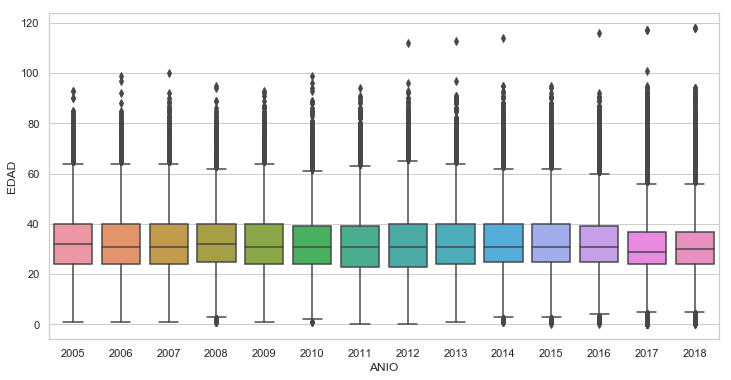

In [111]:
sns.boxplot(x=df.ANIO, y=df.EDAD, data=df)

`Una tendencia apreciable ha sido que la media de las personas que emigran estan en un rango de edad de los 30años. Importante dato sobre el conocimiento de los imigrantes. De igual forma vemos como socialmente los inmigrantes en su mayoria son personas que les gusta tomar retos nuevos, dispuestos a afrontar por problemas y trabajos que quizas una personas mas joven o mayor a 40 años. Si miramos la variacíon de las edades al largo del tiempo, se nota que cada vez mas los extranjeros que llegan a RM són mas jovenes.`

**Una vez ya conociendo con mayor profundidad a los extranjeros, ahora se plantea ver con respecto a los paises que mayor volumen tienen en la RM, evaluar en que comunas viven en la RM.** 

**Comenzamos con Haiti.**


1: 13 => 160 
2: 161 => 452 
3: 453 => 969 
4: 970 => 1478 
5: 1479 => 2768 
6: 2769 => 11493 

   1   2   3   4   5   6


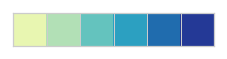

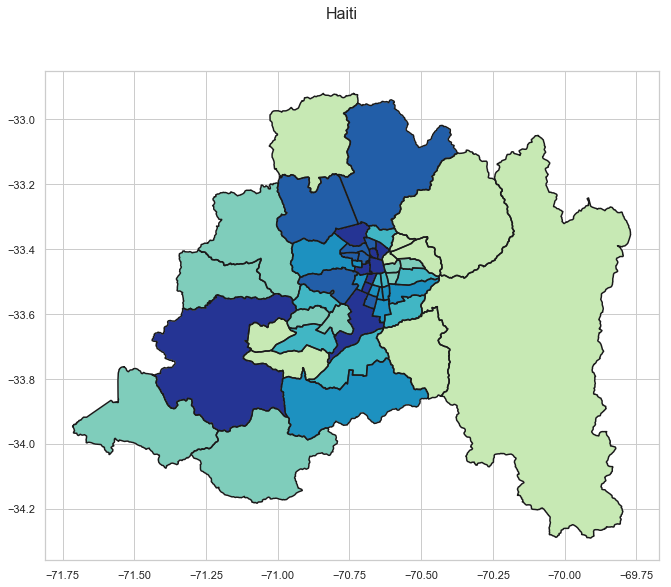

In [53]:
encuentra_extranjeros(df, 'haiti', 2)

**Seguimos con Venezuela, Colomia y Peru**


1: 2 => 71 
2: 72 => 307 
3: 308 => 476 
4: 477 => 953 
5: 954 => 2802 
6: 2803 => 61776 

   1   2   3   4   5   6


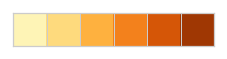

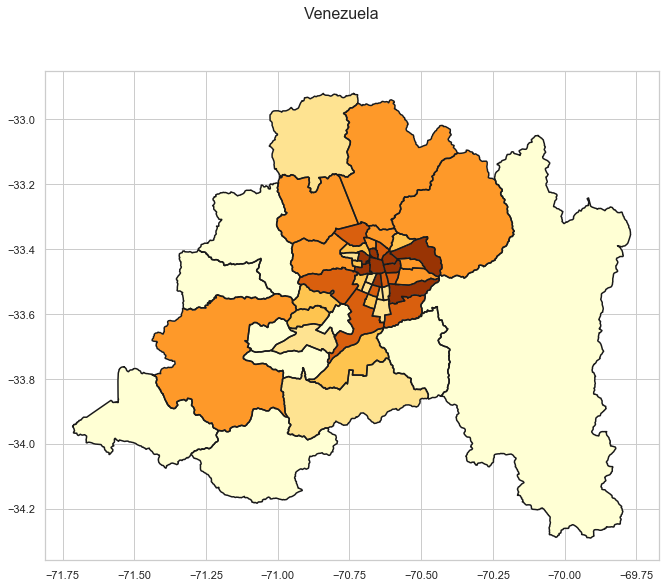

In [54]:
encuentra_extranjeros(df, 'venezuela', 4)


1: 3 => 80 
2: 81 => 317 
3: 318 => 655 
4: 656 => 1217 
5: 1218 => 1962 
6: 1963 => 22695 

   1   2   3   4   5   6


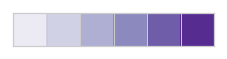

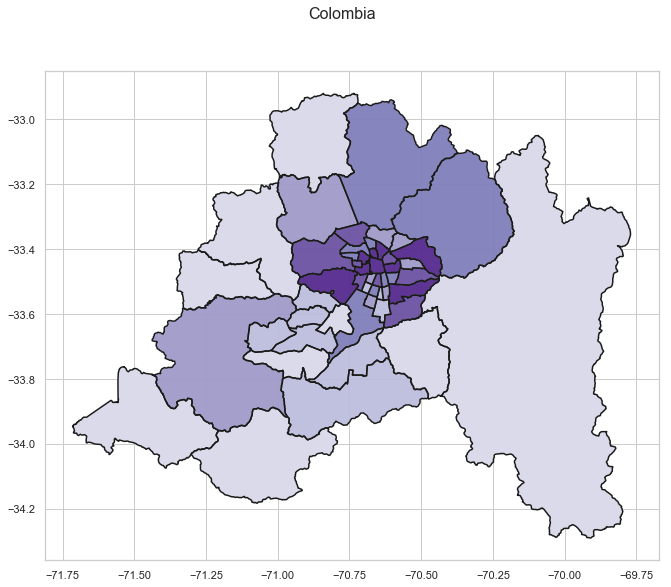

In [55]:
encuentra_extranjeros(df, 'colombia', 1)


1: 8 => 145 
2: 146 => 579 
3: 580 => 1262 
4: 1263 => 2215 
5: 2216 => 3740 
6: 3741 => 43185 

   1   2   3   4   5   6


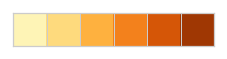

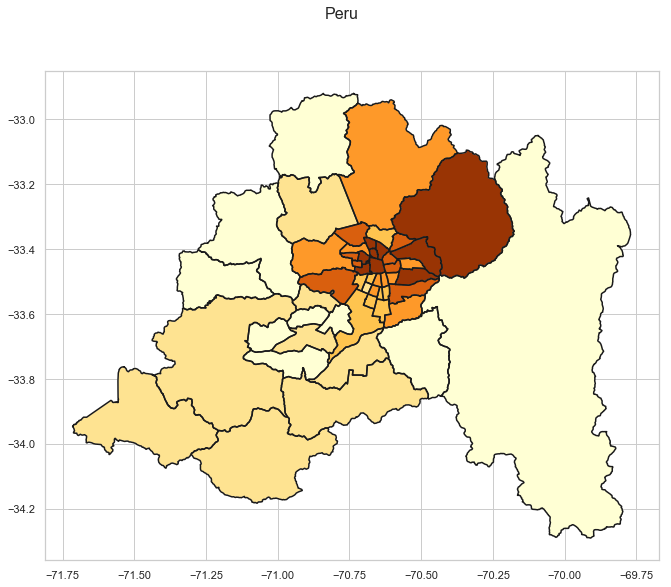

In [56]:
encuentra_extranjeros(df, 'peru', 6)

`En terminos geográficos, se observa que predominatemente los haitianos se ubican en el sector norte-centro-sur-poniente; los venezolanos y colombianos  se encuentran mayormente en el centor o central y los peruanos en el centro-oriente.`

**Para terminar realizamos algunas contabilizaciones y estadisticos para sacar key insights que sean provechosos y enriquesedores del analisis.**

**Realizamos una sumatoria total de los inmigrantes.**

In [57]:
TOT_INM_RM = df.PAIS.value_counts().sum()
TOT_INM_RM

589106

**Evaluamos un top ten para hacer la sumatoria.**

In [58]:
TOP_PAISES_POP_RM = top_pais.sum()
TOP_PAISES_POP_RM

537872

In [59]:
print("Total de Inmigrantes", TOT_INM_RM)
print("Total de Inmigrantes dos Top10: {}, que es {}% del total"
      .format(TOP_PAISES_POP_RM, round((TOP_PAISES_POP_RM/TOT_INM_RM)*100, 0)))

Total de Inmigrantes 589106
Total de Inmigrantes dos Top10: 537872, que es 91.0% del total


In [60]:
TOP_COM_POP = top_com.sum()
print("Total de Inmigrantes dos Top19 comunas: {}, que es {}% del total"
      .format(TOP_COM_POP, round((TOP_COM_POP/TOT_INM_RM)*100, 0)))

Total de Inmigrantes dos Top19 comunas: 478011, que es 81.0% del total


**Ahora vemos en la comuna de SGTO como es la concentracion comparado con el total.**

In [61]:
TOT_SGTO = df[df.COMUNA == 'santiago']
TOT_SGTO_INM = TOT_SGTO.PAIS.value_counts().sum()
print(TOT_SGTO_INM)

162325


In [62]:
print("Total de Inmigrantes en la comuna de SGTO: {}, que es {}% del total del total"
      .format(TOT_SGTO_INM, round((TOT_SGTO_INM/TOT_INM_RM)*100, 0)))

Total de Inmigrantes en la comuna de SGTO: 162325, que es 28.0% del total del total


**Evaluamos ahora con respecto a los 4 paises (Peru, Venezuela, Haiti, Colombia) cuanto contabilizan del total de inmigrantes.**

In [63]:
TOT_PVHC = df[(df.PAIS == 'peru') | 
              (df.PAIS == 'venezuela') |
              (df.PAIS == 'haiti') |
              (df.PAIS == 'colombia')].PAIS.value_counts().sum()
    
print(TOT_PVHC)

451342


In [64]:
print("Total de Inmigrantes 'PVHC' en la comuna de SGTO: {}, que es {}% del total"
      .format(TOT_PVHC, round((TOT_PVHC/TOT_INM_RM)*100, 0)))

Total de Inmigrantes 'PVHC' en la comuna de SGTO: 451342, que es 77.0% del total


In [65]:
TOP_20_EDAD = df.EDAD.value_counts()[0:20].sum()
print(TOP_20_EDAD)

376945


In [66]:
df.EDAD.mean()

30.692712347183697

In [67]:
df.EDAD.value_counts()[0:20]

28    26494
29    25861
27    25812
30    24445
26    23882
31    23473
32    21950
25    21838
33    20561
24    19129
34    18830
35    17433
23    15972
36    15641
37    14593
38    13510
22    13419
39    12254
40    11383
21    10465
Name: EDAD, dtype: int64

In [68]:
print("LA EDAD DE LOS IMNIGRANTES DEL TOTAL ESTAN EN UN TOP 20: {}, que es {}% del total"
      .format(TOP_20_EDAD, round((TOP_20_EDAD/TOT_INM_RM)*100, 0)))

LA EDAD DE LOS IMNIGRANTES DEL TOTAL ESTAN EN UN TOP 20: 376945, que es 64.0% del total


In [69]:
df.PROFESION.value_counts()[0:10].sum()

337672

In [70]:
TOP_10_PROFE = df.PROFESION.value_counts()[0:10].sum()
print(TOP_10_PROFE)

337672


In [71]:
print("El total de las profesiones se concentran en un top 10: {}, que es {}% del total"
      .format(TOP_10_PROFE, round((TOP_10_PROFE/TOT_INM_RM)*100, 0)))

El total de las profesiones se concentran en un top 10: 337672, que es 57.0% del total


Como conclusion quereos agregar insigts importantes del analisis y que hemos extraido de los datos. 

**Key Insights**<br>
- Total de Inmigrantes 589.106
- Total de Inmigrantes dos Top10 comunas: 478.011, que es 81.0% del total
- total en la comuna de Sgto : 162.325  que es un 28% del total del total. 
- 4 paises(Peru, Venezuela, Haiti, Colombia) acumulan: 451.291 que es un 77% del total
- La edad media de los inmigrantes es de 30 años, y el top 20 de las edad cercanas a la media, esta al rededor de la media. 
- Dentro de las profesiones y/o ocupacion que tienen los inmigrantes es el de empleado, y el top ten de las profesiones representan un 57%. 

### 3. Analisis de clusterización de Comunas
Desando enriquecer mucho mas el analisis proponemos este analisis extra para verificar mucho mas a profundidad donde se encuentran el resto de los inmigrantes.

**Verificamos los demás top 10 paises**


1: 4 => 17 
2: 18 => 28 
3: 29 => 37 
4: 38 => 100 
5: 101 => 222 
6: 223 => 2190 

   1   2   3   4   5   6


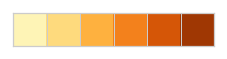

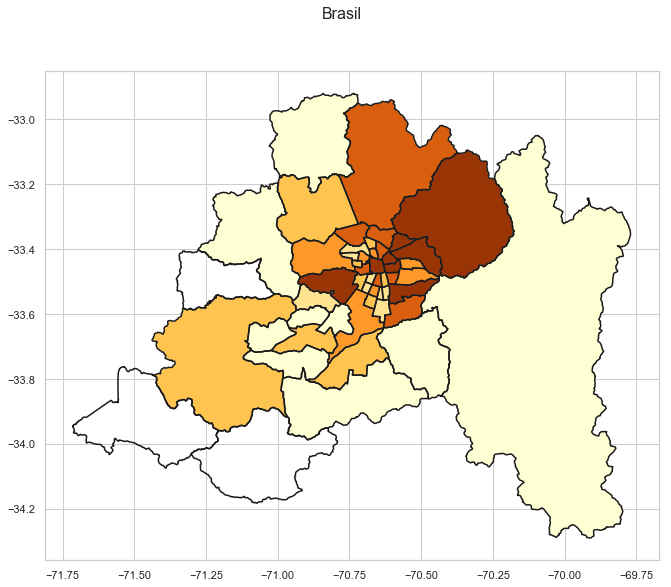

In [72]:
encuentra_extranjeros(df, 'brasil')


1: 1 => 1 
2: 2 => 3 
3: 4 => 5 
4: 6 => 15 
5: 16 => 35 
6: 36 => 563 

   1   2   3   4   5   6


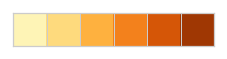

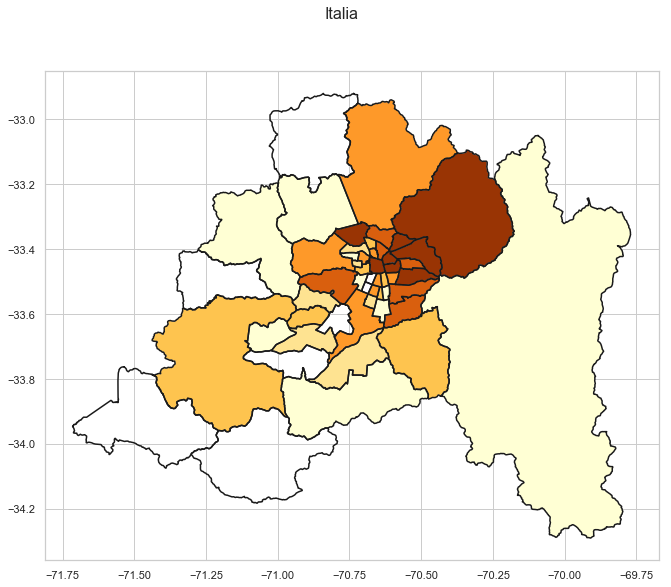

In [73]:
encuentra_extranjeros(df, 'italia')


1: 2 => 16 
2: 17 => 71 
3: 72 => 109 
4: 110 => 193 
5: 194 => 405 
6: 406 => 5737 

   1   2   3   4   5   6


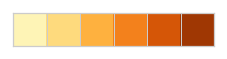

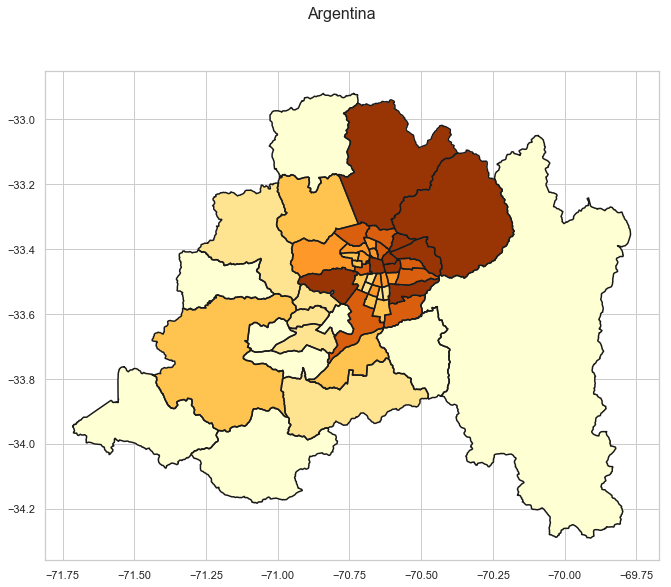

In [74]:
encuentra_extranjeros(df, 'argentina')


1: 3 => 8 
2: 9 => 11 
3: 12 => 27 
4: 28 => 53 
5: 54 => 114 
6: 115 => 3484 

   1   2   3   4   5   6


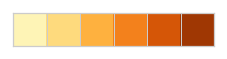

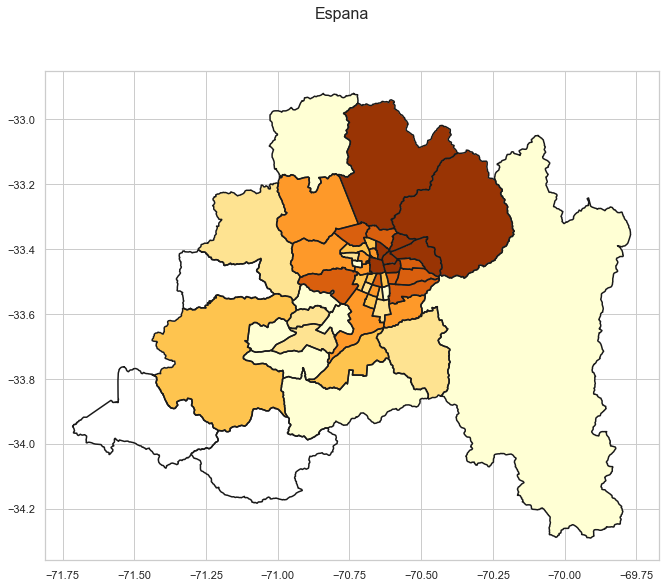

In [75]:
encuentra_extranjeros(df, 'espana')


1: 7 => 60 
2: 61 => 124 
3: 125 => 169 
4: 170 => 244 
5: 245 => 567 
6: 568 => 3211 

   1   2   3   4   5   6


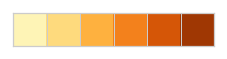

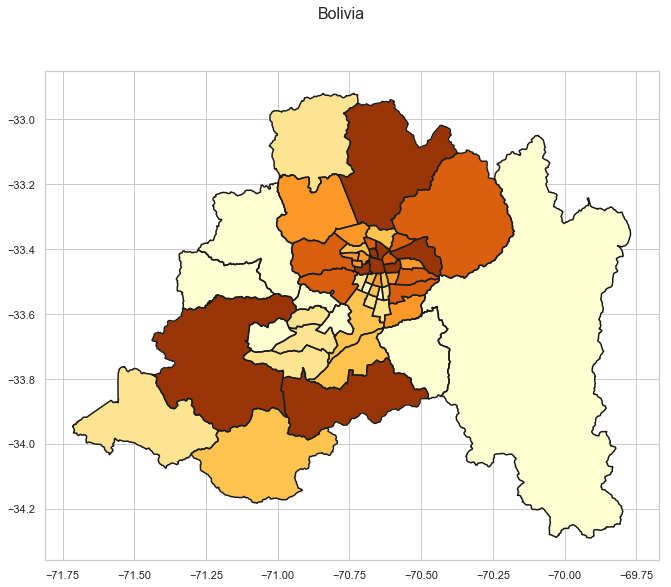

In [76]:
encuentra_extranjeros(df, 'bolivia')


1: 4 => 60 
2: 61 => 114 
3: 115 => 174 
4: 175 => 291 
5: 292 => 518 
6: 519 => 4244 

   1   2   3   4   5   6


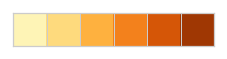

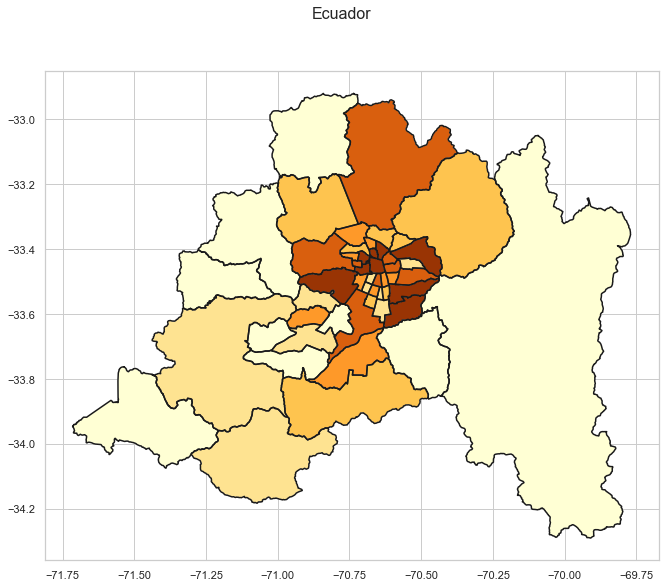

In [77]:
encuentra_extranjeros(df, 'ecuador')


1: 1 => 9 
2: 10 => 26 
3: 27 => 55 
4: 56 => 96 
5: 97 => 185 
6: 186 => 1873 

   1   2   3   4   5   6


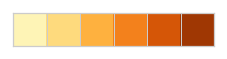

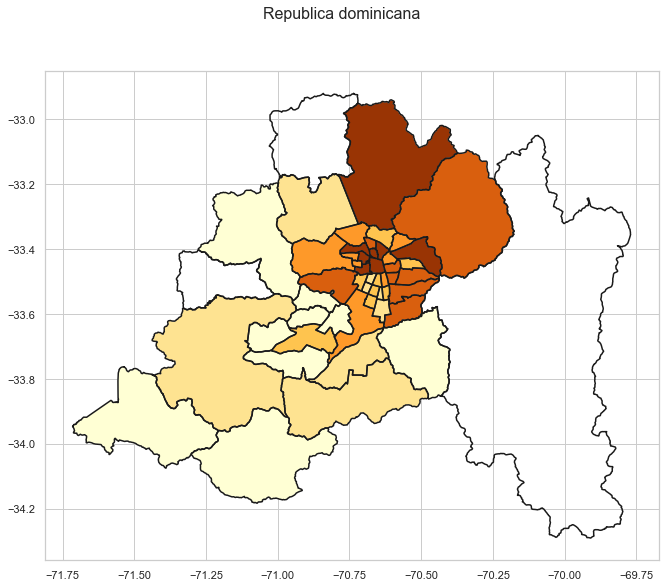

In [78]:
encuentra_extranjeros(df, 'republica dominicana')

`En general las nacionalidades se reparten en un grupo de comunas. Se observa tambien que existen similitudes entre varias nacionalidades. Esto puede tener algo que ver con nivel de renta, similitudes en cultura, etc. Por ejemplo, paises que se quedan mas al oriente, en general se dispersan por Las Condes, Vitacura, Providencia, Lo Barnechea y hasta Nuñoa. Un posíble agrupamiento de comunas en "sub-regiones", sería como mostrado abajo:`

### 4. Clusterización de Comunas por setores

Como Trabajo mucho ams especifico describimos una clusterizacion de comunas por sectores.

In [79]:
centro = ['santiago']
oriente = ['providencia', 'vitacura', 'lo barnechea', 'las condes', 'la reina', 'nunoa']
sureste = ['san jose de maipo', 'macul', 'la florida', 'penalolen',]
sur = ['alhue', 'calera de tango', 'buin', 'isla de maipo', 'el bosque', 'paine', 'la granja', 'pedro aguirre cerda', 'lo espejo', 'puente alto', 'san joaquin', 'san miguel', 'pirque', 'san bernardo', 'san ramon', 'la cisterna', 'talagante', 'la pintana', ]
norte = ['tiltil', 'renca', 'quinta normal', 'cerro navia', 'lampa', 'conchali', 'recoleta', 'independencia', 'colina', 'huechuraba', 'quilicura', ]
poniente = ['san pedro', 'maria pinto', 'el monte', 'curacavi', 'padre hurtado', 'melipilla', 'estacion central', 'maipu', 'lo prado', 'pudahuel', 'penaflor', 'cerrillos', ]  

25 SANTIAGO


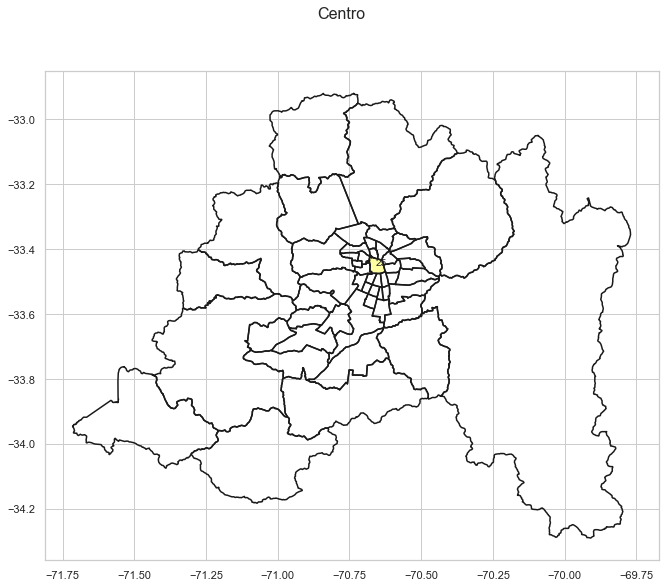

In [80]:
plot_comunas(sf, 'Centro', centro, 'y');

30 PROVIDENCIA
2 VITACURA
1 LO BARNECHEA
0 LAS CONDES
15 LA REINA
16 ÑUÑOA


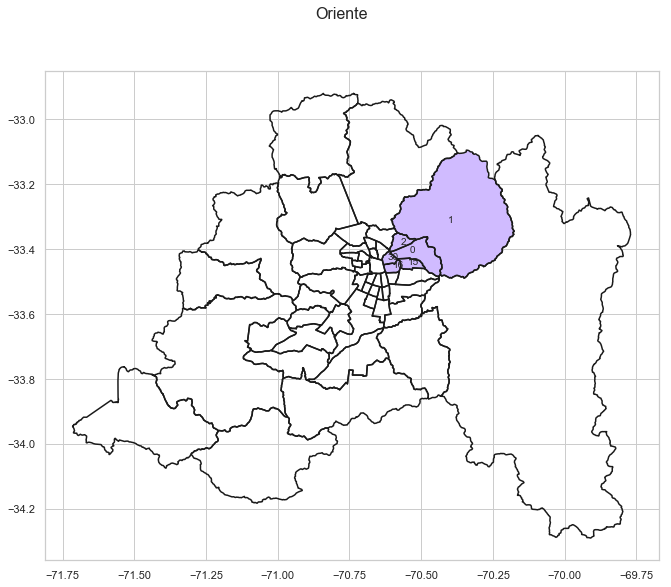

In [81]:
plot_comunas(sf, 'Oriente', oriente, 'm')

38 SAN JOSÉ DE MAIPO
17 MACUL
13 LA FLORIDA
39 PEÑALOLÉN


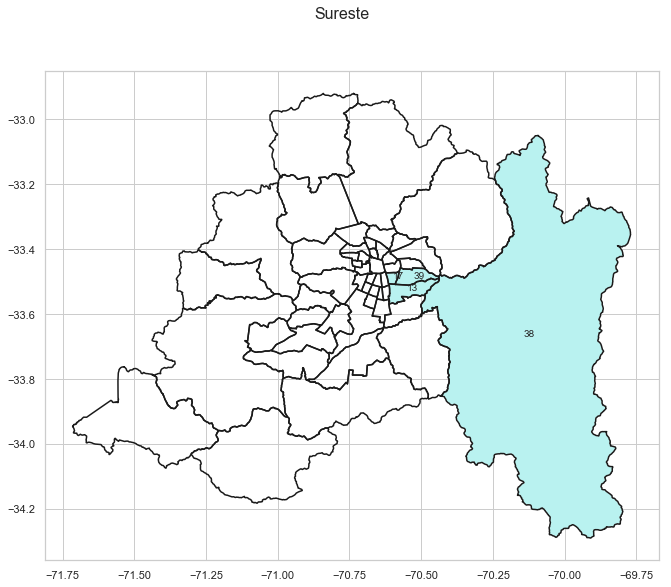

In [82]:
plot_comunas(sf, 'Sureste', sureste, 'c')

49 ALHUÉ
41 CALERA DE TANGO
31 BUIN
34 ISLA DE MAIPO
9 EL BOSQUE
37 PAINE
14 LA GRANJA
28 PEDRO AGUIRRE CERDA
7 LO ESPEJO
40 PUENTE ALTO
18 SAN JOAQUÍN
29 SAN MIGUEL
36 PIRQUE
42 SAN BERNARDO
12 SAN RAMÓN
11 LA CISTERNA
33 TALAGANTE
10 LA PINTANA


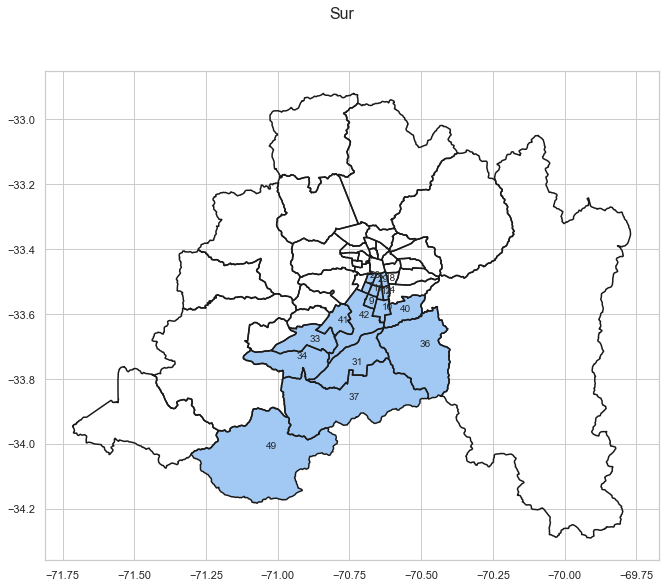

In [83]:
plot_comunas(sf, 'Sur', sur, 'b')

51 TILTIL
22 RENCA
24 QUINTA NORMAL
23 CERRO NAVIA
50 LAMPA
21 CONCHALÍ
20 RECOLETA
19 INDEPENDENCIA
43 COLINA
3 HUECHURABA
5 QUILICURA


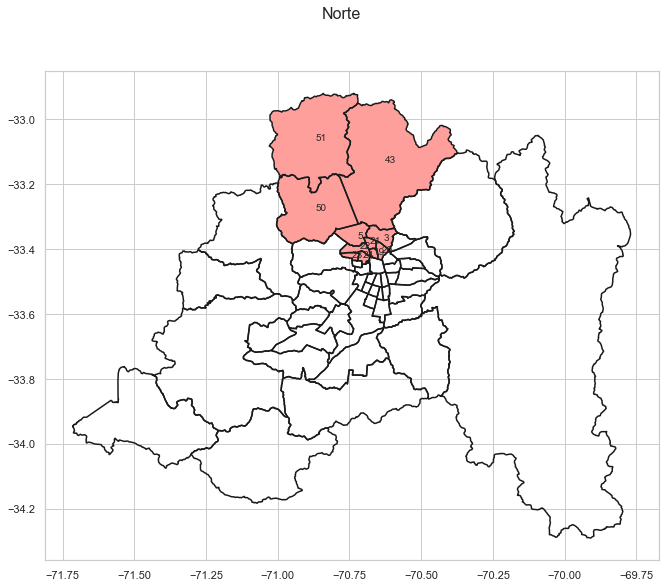

In [84]:
plot_comunas(sf, 'Norte', norte, 'r')

48 SAN PEDRO
45 MARÍA PINTO
32 EL MONTE
46 CURACAVÍ
47 PADRE HURTADO
44 MELIPILLA
26 ESTACIÓN CENTRAL
8 MAIPÚ
27 LO PRADO
4 PUDAHUEL
35 PEÑAFLOR
6 CERRILLOS


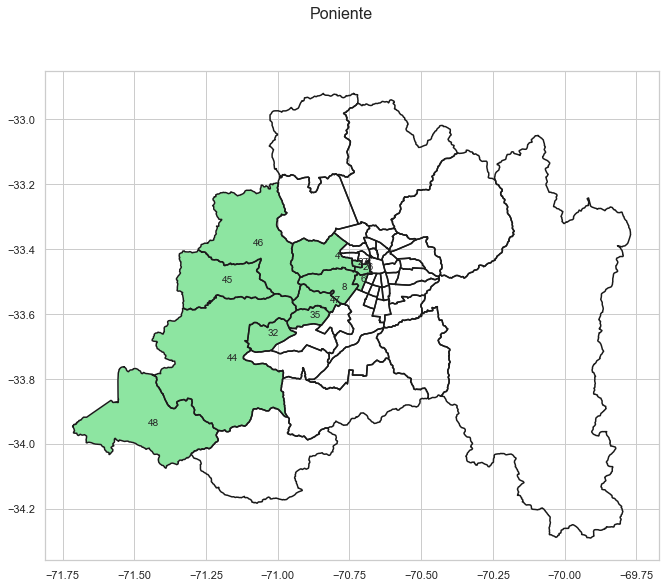

In [85]:
plot_comunas(sf, 'Poniente', poniente, 'g')

### 5. Contextualización de la data con el Censo 2017

**A partir de la data del INE, disponible para el CENSO 2017, se utilizo un dataset a nivel de Comunas, con datos referentes al número total de personas ('PERSONAS'); número de inmigrantes (INMIGRANTES); numero tortal de vivendas (TOTAL_VIV). A partir de estes datos se crearon dos nuevas columnas: Percentual de inmigrantes sobre la populación total de la comuna ('INM_PERC') y numero de personas por vivenda, o 'House Hold' (PERS_VIV).**

In [86]:
!ls ./data

01_extranjeros_rm.xlsx                PDs_2018_1.xlsx
CENSO_2017_COMUNAS_RM.xlsx            Visas-2017.xlsx
Comunas_RM_Mapas_Vectoriales          Visas-2018_1.xlsx
ML_extranjeros_rm.xlsx                censo_2017_RM.xlsx
PDs-2005-2016.xlsx                    censo_2017_inmigrantes_rm_comuna.xlsx
PDs-2017.xlsx


In [87]:
censo = pd.read_excel('./data/CENSO_2017_COMUNAS_RM.xlsx')
censo.shape

(52, 7)

In [88]:
censo.head()

COMUNA   NOM_COMUNA  INMIGRANTES  PERSONAS   INM_PERC  TOTAL_VIV  PERS_VIV
0   13101     santiago       110732    404495  27.375369     193628  2.089032
1   13102    cerrillos         3620     80832   4.478424      24547  3.292948
2   13103  cerro navia         6022    132622   4.540725      38020  3.488217
3   13104     conchali         9223    126955   7.264779      37759  3.362245
4   13105    el bosque         3368    162505   2.072552      47941  3.389687

In [89]:
censo.INMIGRANTES.sum()

457110

In [90]:
censo.describe()

COMUNA    INMIGRANTES       PERSONAS   INM_PERC      TOTAL_VIV  \
count     52.000000      52.000000      52.000000  52.000000      52.000000   
mean   13238.076923    8790.576923  136784.769231   5.475273   45739.269231   
std      178.051309   16109.245087  118799.640996   5.868202   41659.171872   
min    13101.000000      44.000000    6444.000000   0.522443    2658.000000   
25%    13113.750000    1445.250000   79183.250000   1.940365   24310.250000   
50%    13126.500000    4946.500000  101604.000000   3.401676   32559.500000   
75%    13401.250000    9675.000000  149826.000000   6.834967   50076.000000   
max    13605.000000  110732.000000  568106.000000  29.938872  193628.000000   

        PERS_VIV  
count  52.000000  
mean    3.039303  
std     0.392010  
min     2.002100  
25%     2.796959  
50%     3.126620  
75%     3.363728  
max     3.690297


1: 6444 => 36070 
2: 36071 => 90200 
3: 90201 => 101603 
4: 101604 => 132621 
5: 132622 => 209322 
6: 209323 => 568105 

   1   2   3   4   5   6


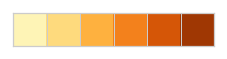

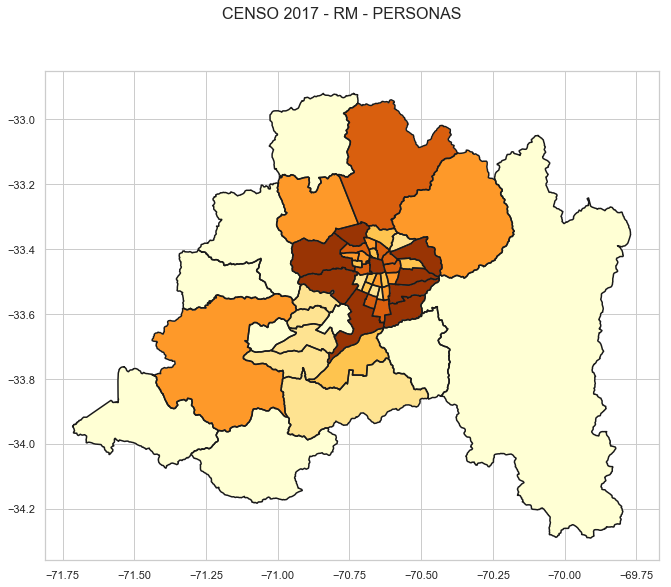

In [91]:
map_datos_censo(censo, 'PERSONAS') 


1: 2658 => 11846 
2: 11847 => 28944 
3: 28945 => 32558 
4: 32559 => 43120 
5: 43121 => 69665 
6: 69666 => 193627 

   1   2   3   4   5   6


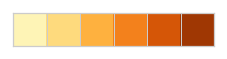

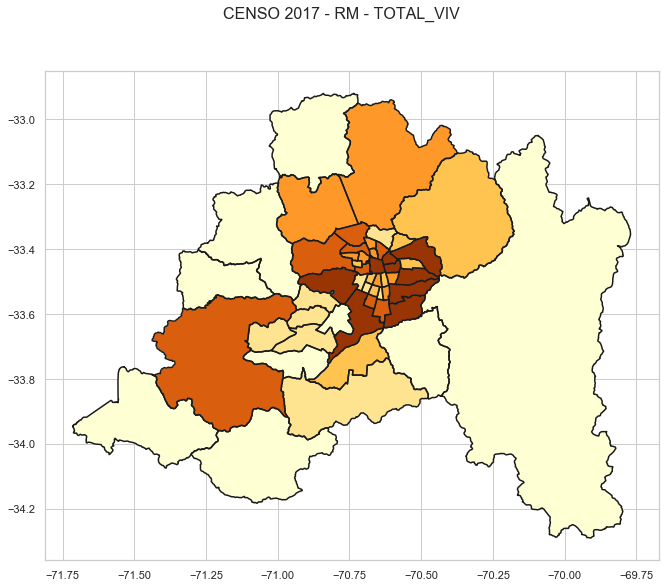

In [92]:
map_datos_censo(censo, 'TOTAL_VIV') 

`Llama la atención el gran número de personas que viven al rededor de la comuna de Santiago, pero no tan cerca. Es claro que el costo de vida es mas bajo a medidad que se aleja del centro (excepto para el setor oriente). Mirando el número tortal de vivendas se observa que hay una correlación entre estos dados. Quisá En el sector Norte (principalmante Colina) parece que las vivendas no siguen esta correlación. Miremos la relación Personas / Vivenda:`


1: 2 => 1 
2: 2 => 1 
3: 2 => 2 
4: 3 => 2 
5: 3 => 2 
6: 3 => 2 

   1   2   3   4   5   6


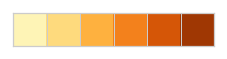

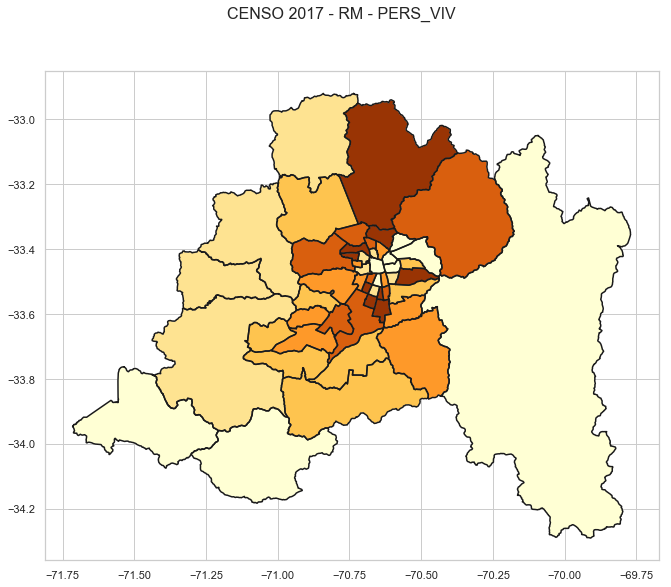

In [93]:
map_datos_censo(censo, 'PERS_VIV') 

`Realmente se comprueba que Colina está en el rango de mas grande dencidade de personas por vivenda. Notar tambiem que a media de personas por vivenda es de 3 personas/vivenda. De acuerdo al INE, este número ya fue de 4,4 en 1992.`


1: 44 => 523 
2: 524 => 2782 
3: 2783 => 4945 
4: 4946 => 7410 
5: 7411 => 11826 
6: 11827 => 110731 

   1   2   3   4   5   6


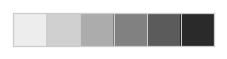

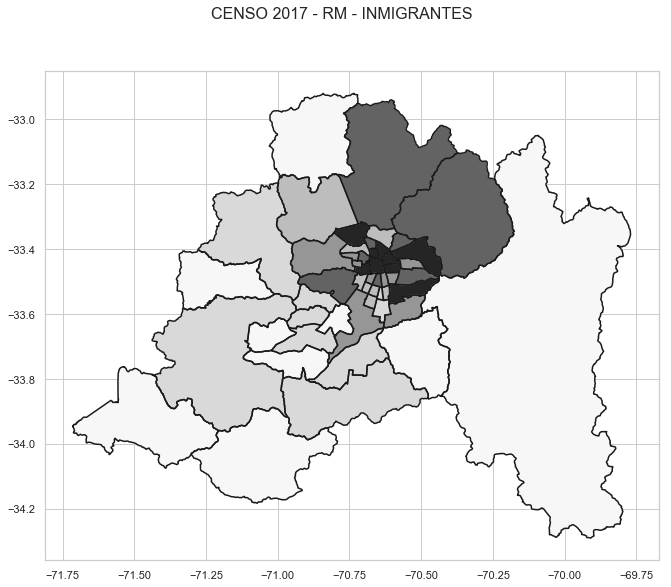

In [94]:
map_datos_censo(censo, 'INMIGRANTES', 3) 

`El Mapa arriba, usa data del CENSO 2017, lo que es muy similar al visto anteriormente con la data de inmigrantes construída a partir de la data del DEM. Pero es importante notar que la data utilizada en este trabajo incluye data de 2018, encuanto el Censo es de 2017. En este período mas de 100,000 extranjeros ingresaron en el país.`


1: 0 => 0 
2: 1 => 1 
3: 2 => 2 
4: 3 => 4 
5: 5 => 7 
6: 8 => 28 

   1   2   3   4   5   6


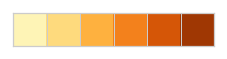

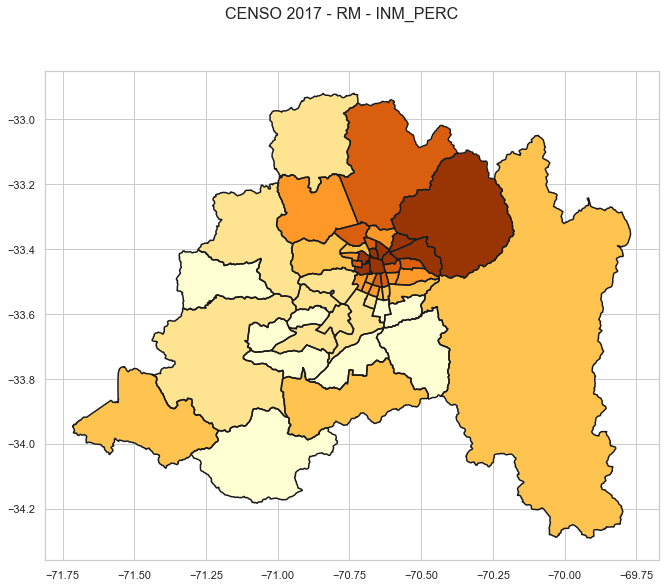

In [95]:
map_datos_censo(censo, 'INM_PERC') 

In [96]:
censo.sort_values('INM_PERC', ascending=False)[0:9]

COMUNA        NOM_COMUNA  INMIGRANTES  PERSONAS   INM_PERC  TOTAL_VIV  \
7    13108     independencia        30023    100281  29.938872      36666   
0    13101          santiago       110732    404495  27.375369     193628   
5    13106  estacion central        22479    147041  15.287573      52486   
26   13127          recoleta        23329    157851  14.779127      50178   
22   13123       providencia        15628    142079  10.999514      70965   
31   13132          vitacura         9330     85384  10.927106      31777   
25   13126     quinta normal        11626    110026  10.566593      38989   
13   13114        las condes        30308    294838  10.279543     118007   
14   13115      lo barnechea        10667    105833  10.079087      31225   

    PERS_VIV  
7   2.734986  
0   2.089032  
5   2.801528  
26  3.145821  
22  2.002100  
31  2.686975  
25  2.821975  
13  2.498479  
14  3.389367

`Case 30% de las personas que viven en Santiago y independencia són extranjeros. En las comunas del setor oriente, este índice es de 10%. En el mapa se puede comprobar la fuerte concentración de extranjeros en los setores central y oriente.`